In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<a id='section_0'></a>

<a href='#section_1'>EDA</a>
1. <a href='#section_1'>Target analysis</a>
2. <a href='#section_2'>Numerical columns analysis</a>
3. <a href='#section_3'>Numerical vs target</a>
4. <a href='#section_4'>Multivariable analysis</a>
5. <a href='#section_41'>Some conclusions from EDA</a>


<a href='#section_5'>Machine Learning Models</a>
1. <a href='#section_42'>Elastic Net</a>
2. <a href='#section_51'>Support Vector Machine regressor</a>
3. <a href='#section_6'>Random Forest Regressor</a>
4. <a href='#section_7'>AdaBoostRegressor</a>
5. <a href='#section_8'>GradientBoostingRegressor</a>
6. <a href='#section_9'>xgboost</a>
7. <a href='#section_10'>xgboost with regularisation</a>
8. <a href='#section_101'>some conclusions from ML models</a>

<a href='#section_11'>Feature Engineering and applying best features</a>
1. <a href='#section_11'>Feature engineering</a>
2. <a href='#section_12'>Trying best models with new features</a>
3. <a href='#section_13'>Random Forest</a>
4. <a href='#section_14'>GradientBoostingRegressor</a>
5. <a href='#section_15'>ElasticNet</a>
6. <a href='#section_16'>Some conclusion</a>

In [3]:
bodyfat = pd.read_csv("bodyfat.csv")
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
bodyfat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
bodyfat.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [6]:
target = 'BodyFat'
hard_to_measure = 'Density'
numerical_cols = ['Age', 
                  'Weight',
                  'Height', 
                  'Neck', 
                  'Chest',
                  'Abdomen', 
                  'Hip', 
                  'Thigh', 
                  'Knee', 
                  'Ankle', 
                  'Biceps', 
                  'Forearm',
                  'Wrist'
                 ]

<a id='section_1'></a>
## Target Analysis
<a href='#section_0'>go up</a>

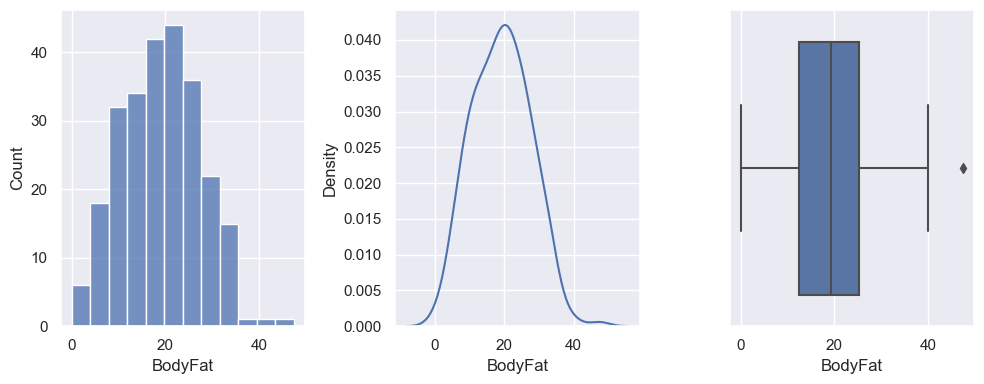

In [27]:
sns.set_theme()
fig, axes = plt.subplots(1,3)
fig.set_size_inches((10,4))
sns.histplot(data=bodyfat, x=target, ax=axes[0])
sns.kdeplot(data=bodyfat, x=target, ax=axes[1])
sns.boxplot(data=bodyfat, x=target, ax=axes[2])
plt.tight_layout()

In [7]:
bodyfat[target].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

<a id='section_2'></a>
## Numerical columns analysis
<a href='#section_0'>go up</a>

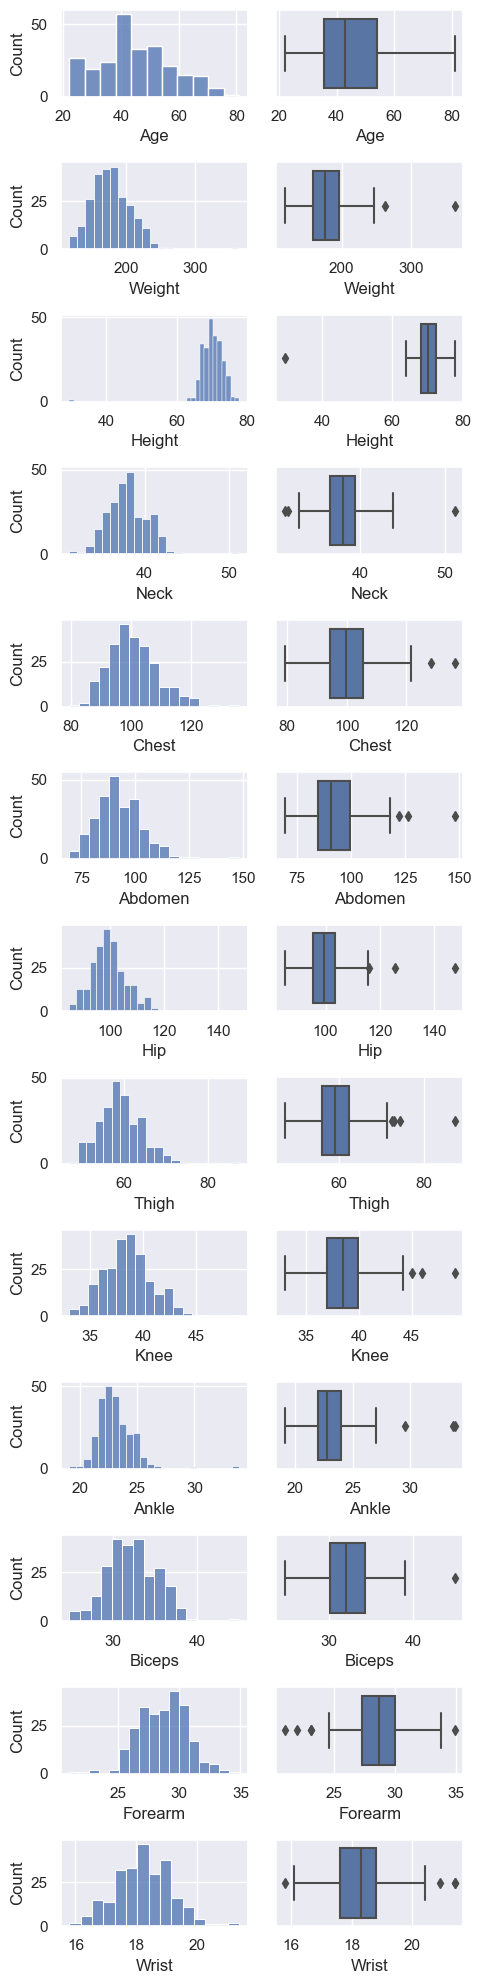

In [8]:
fig, axes = plt.subplots(len(numerical_cols), 2)
fig.set_size_inches((5,20))
for pos, col_name in enumerate(numerical_cols):
    sns.histplot(data=bodyfat, x=col_name, ax=axes[pos, 0])
    sns.boxplot(data=bodyfat, x=col_name, ax=axes[pos, 1])
plt.tight_layout()

In [9]:
for col_name in numerical_cols:
    print(col_name, '\n', bodyfat[col_name].describe())

Age 
 count    252.000000
mean      44.884921
std       12.602040
min       22.000000
25%       35.750000
50%       43.000000
75%       54.000000
max       81.000000
Name: Age, dtype: float64
Weight 
 count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Weight, dtype: float64
Height 
 count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Height, dtype: float64
Neck 
 count    252.000000
mean      37.992063
std        2.430913
min       31.100000
25%       36.400000
50%       38.000000
75%       39.425000
max       51.200000
Name: Neck, dtype: float64
Chest 
 count    252.000000
mean     100.824206
std        8.430476
min       79.300000
25%       94.350000
50%       99.650000
75%      105.375000
max      136.200000
Name: Chest, dtype: float64
Abdomen 
 count    252

<a id='section_3'></a>
## Numerical vs target
<a href='#section_0'>go up</a>

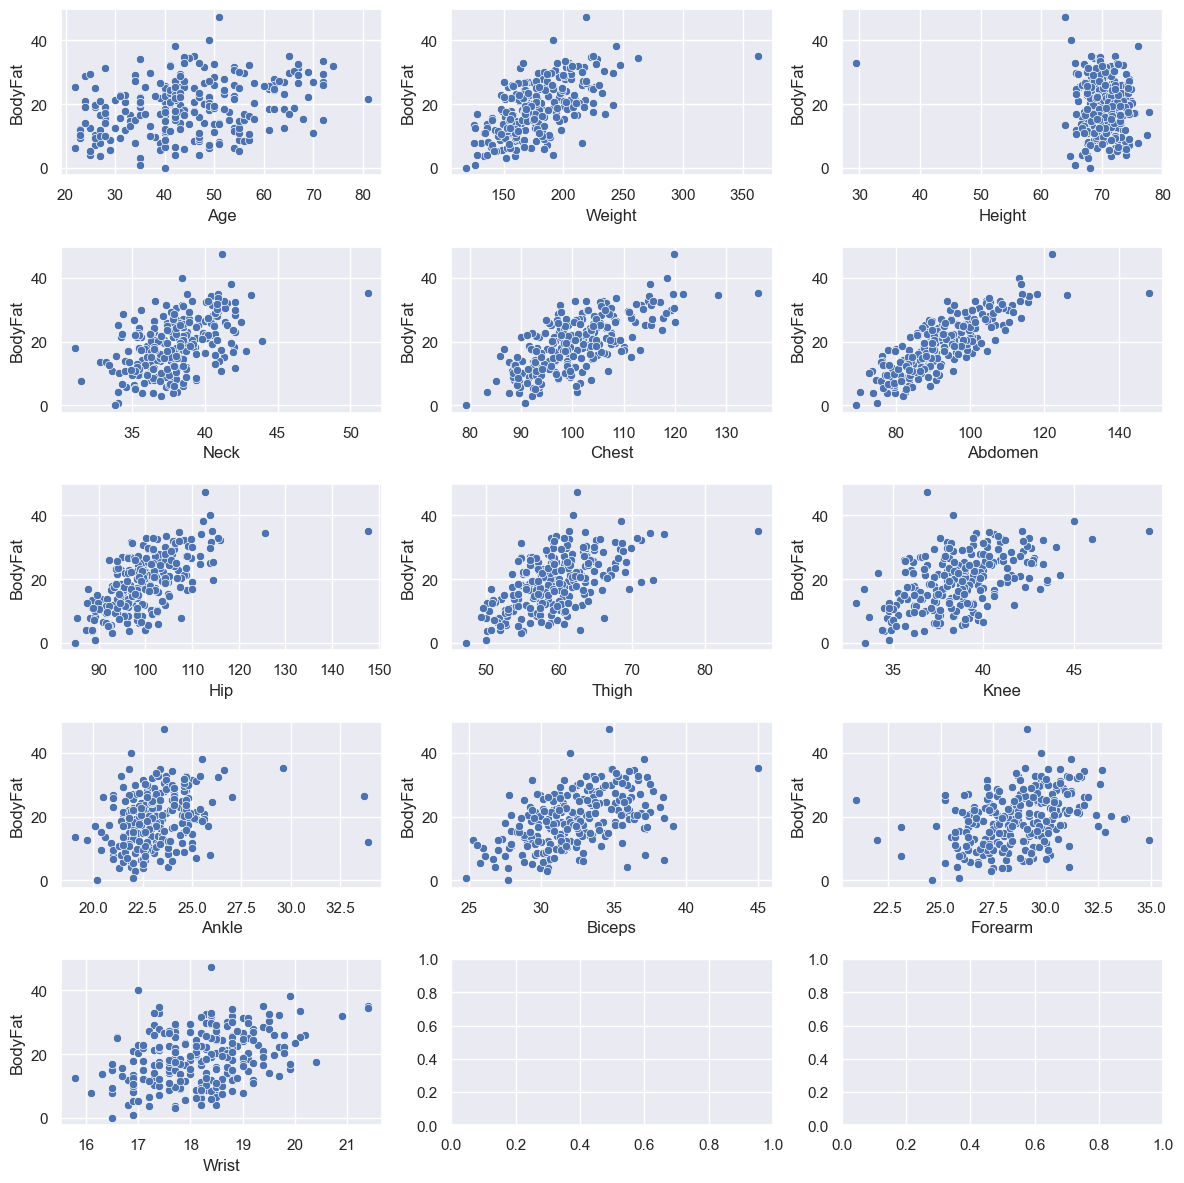

In [10]:
fig, axes = plt.subplots(5,3)
fig.set_size_inches((12,12))
for pos, col_name in enumerate(numerical_cols):
    sns.scatterplot(data=bodyfat, x=col_name, y=target, ax=axes.ravel()[pos])
plt.tight_layout()

<a id='section_4'></a>
## Multivariable analysis
<a href='#section_0'>go up</a>

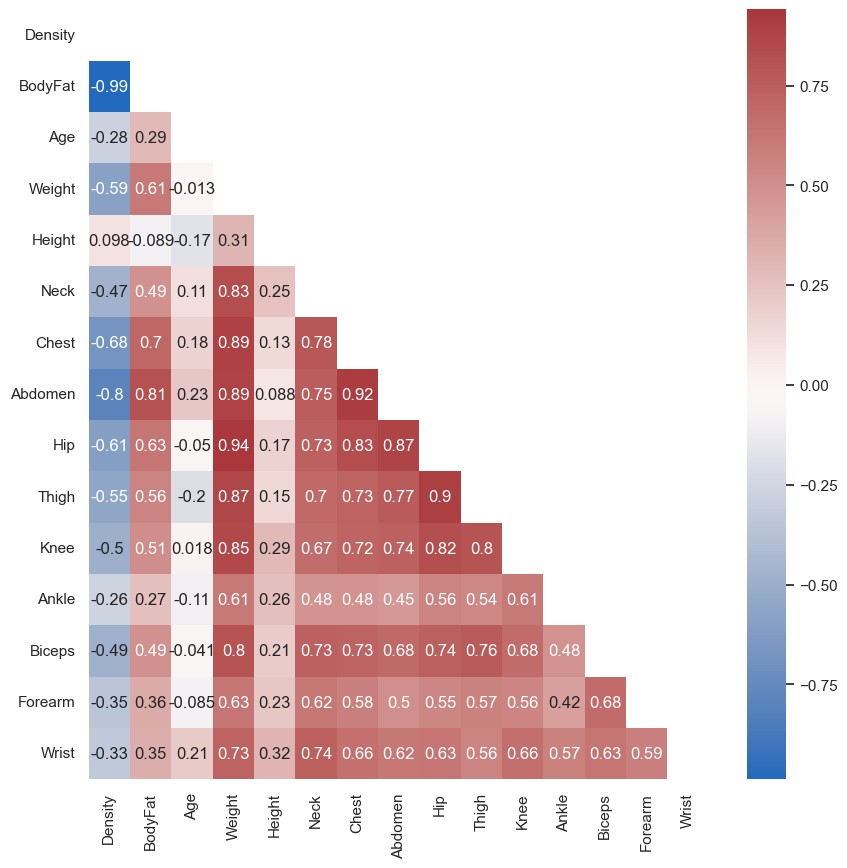

In [12]:
m_corr = bodyfat.corr()
mask = np.triu(np.ones_like(m_corr))
plt.figure(figsize=(10,10))
sns.set_style("white")
sns.heatmap(data=m_corr, mask = mask, annot=True, cmap='vlag')
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X=bodyfat[numerical_cols].values, y=bodyfat[target].values)

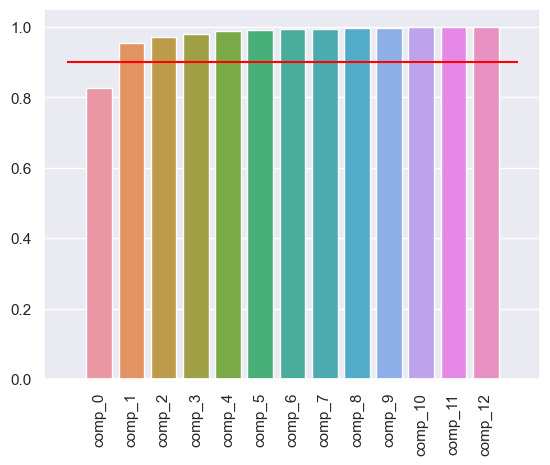

In [28]:
sns.barplot(y=np.cumsum(pca.explained_variance_ratio_), x=[f"comp_{i}" for i in range(len(pca.explained_variance_ratio_))]) 
plt.xticks(rotation=90)
plt.hlines(y=0.9, xmin=-1, xmax=13, colors=["red"])
plt.show()

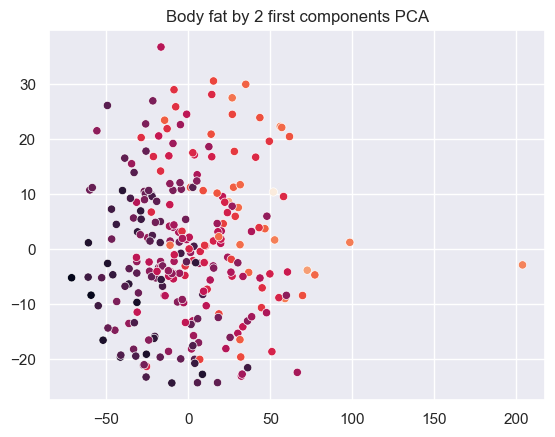

In [40]:
sns.scatterplot(x=X[:,0], y=X[:,1], c=bodyfat[target].values, )
plt.title('Body fat by 2 first components PCA')
plt.show()

<a id='section_41'></a>
### Some conclusions from EDA

We have a complete dataset without any missing values. The features exhibit a high degree of correlation with each other, as observed through pairwise plots and the correlation matrix.

Additionally, the distribution of each feature shows the presence of outliers, as indicated by the bar plots. The distribution of the target variable visually corresponds to a Normal distribution, although there is a small secondary peak observed on the right side of the graph.

All the features in the dataset are numerical and continuous variables. However, we choose to exclude the 'Density' feature in subsequent sections. This decision is based on its difficulty in measurement compared to other statistics, and our interest lies in constructing a model that can extract information from easily measurable statistics.

With help of PCA, we can see that our model unevitable will have difficulties with predicting as values are quite mixed up.

<a href='#section_0'>go up</a>

<a id='section_5'></a>
# Machine Learning Models
<a href='#section_0'>go up</a>

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay

X_train, X_test, y_train, y_test = train_test_split(bodyfat[numerical_cols].values, bodyfat[target].values, random_state=0)

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def show_metrics(y_pred, y_test):
    print("r^2:", r2_score(y_pred=y_pred, y_true=y_test))
    print("MAE:", mean_absolute_error(y_pred=y_pred, y_true=y_test))
    print("MSE:", mean_squared_error(y_pred=y_pred, y_true=y_test))

In [22]:
models = pd.DataFrame({
    'Name' : [],
    'r2_train':[],
    'r2_test':[]
})
models

,Name,r2_train,r2_test


<a id='section_42'></a>
## Elastic Net
<a href='#section_0'>go up</a>

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('elasticnet', ElasticNet())
])
params = {
    'param_grid':{
        'elasticnet__alpha': [0.01, 0.1, 1, 2],
        'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 1]
        
    }
}
grid = GridSearchCV(pipe, **params)
grid.fit(X_train, y_train)
grid.best_params_

{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 1}

In [17]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('elasticnet', ElasticNet(alpha=0.01, l1_ratio=1, random_state=0))
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7718952516822446
MAE: 3.1757288093694553
MSE: 14.981081933700025


In [18]:
print('Metrics on train data:')
y_pred = pipe.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.7388727615602633
MAE: 3.5562610129270715
MSE: 18.535136541630806


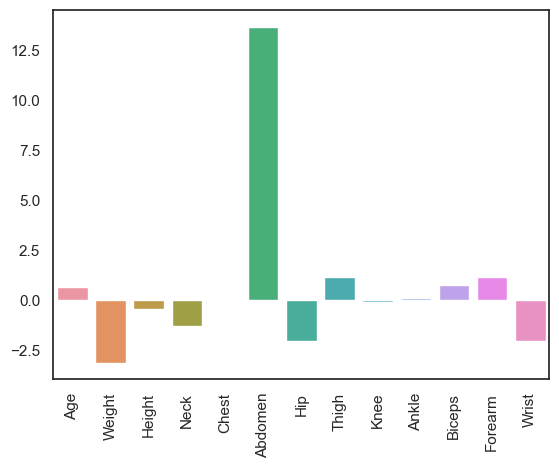

In [19]:
sns.barplot(x=bodyfat.drop(columns=['Density','BodyFat']).columns, y = pipe.__dict__['steps'][-1][-1].coef_ )
plt.xticks(rotation=90)
plt.show()

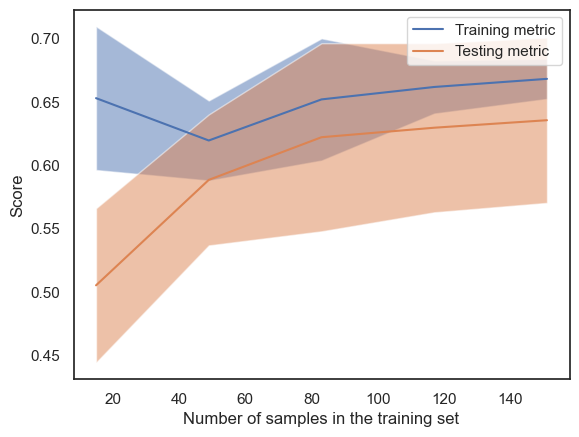

In [20]:
X_scaled = MinMaxScaler().fit_transform(X_train)
LearningCurveDisplay.from_estimator(estimator=ElasticNet(alpha=0.1, l1_ratio=1, random_state=0), X=X_scaled, y=y_train, score_type='both', cv=5)
plt.show()

In [23]:
models.loc[len(models.index)] = ["ElasticNet(alpha=0.01, l1_ratio=1)", r2_score(y_train, pipe.predict(X_train)), r2_score(y_test, pipe.predict(X_test))]
models

,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895


<a id='section_51'></a>
## Support Vector Machine regressor
<a href='#section_0'>go up</a>

In [24]:
from sklearn.svm import SVR
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('svr', SVR() )
])

params = {
    'param_grid':{
        'svr__kernel':['linear', 'rbf', 'poly'],
        'svr__C':[0.01, 0.1, 1, 10, 100],
        'svr__degree':[2, 3]
    }
}


grid = GridSearchCV(pipe, **params)
grid.fit(X_train, y_train)
grid.best_params_

{'svr__C': 10, 'svr__degree': 2, 'svr__kernel': 'linear'}

In [25]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('svr',  SVR(C=10, kernel='linear'))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7612204649618985
MAE: 3.3084475114606873
MSE: 15.682162711990113


In [26]:
print('Metrics on train data:')
y_pred = pipe.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.7301580176236451
MAE: 3.462799019858992
MSE: 19.15371991790255


In [27]:
models.loc[len(models.index)] = ["SVR(C=10, kernel=\'linear\')",  r2_score(y_train, pipe.predict(X_train)), r2_score(y_test, pipe.predict(X_test))]
models

,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
1,"SVR(C=10, kernel='linear')",0.730158,0.761220


<a id='section_6'></a>
## Random Forest Regressor
<a href='#section_0'>go up</a>

In [28]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'estimator': RandomForestRegressor(),
    'param_grid': {
        'n_estimators': [ 100, 250, 500],
        'max_depth': [1, 10, 15, None]
    }
}

grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': None, 'n_estimators': 250}

In [29]:
rforest = RandomForestRegressor(n_estimators=250, max_depth=None, random_state=0)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
show_metrics(y_pred, y_test)
print('Metrics on train data:')
y_pred = pipe.predict(X_train)
show_metrics(y_pred, y_train)

r^2: 0.7705691895953701
MAE: 3.190958730158729
MSE: 15.068172820317459
Metrics on train data:
r^2: 0.7301580176236451
MAE: 3.462799019858992
MSE: 19.15371991790255


In [30]:
models.loc[len(models.index)] = ["RandomForestRegressor(n_estimators=250, max_depth=None)", r2_score(y_train, rforest.predict(X_train)), r2_score(y_test, rforest.predict(X_test))]
models


,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569


<a id='section_7'></a>
## AdaBoostRegressor

<a href='#section_0'>go up</a>

#### AdaBoost with Decision Tree

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
params = {
    'estimator': AdaBoostRegressor(),
    'param_grid': {
        'n_estimators': [ 250, 500, 1000],
        'learning_rate': [0.01, 0.1, 1, 10]
    }
}
gr_search = GridSearchCV(**params)
gr_search.fit(X_train, y_train)
gr_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [32]:
ada_regr = AdaBoostRegressor(**gr_search.best_params_, random_state=0)
ada_regr.fit(X_train, y_train)
y_pred = ada_regr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7706158536935114
MAE: 3.1598637944491768
MSE: 15.065108093770679


In [33]:
print('Metrics on train data:')
y_pred = ada_regr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.8329499112530553
MAE: 2.9948280470281654
MSE: 11.857423311014456


In [34]:
models.loc[len(models.index)] = ["AdaBoostRegressor(estimator=DecisionTree(),n_estimators=1000,learning_rate=0.1 )",r2_score(y_train, ada_regr.predict(X_train)), r2_score(y_test, ada_regr.predict(X_test))]
models

,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569
3,"AdaBoostRegressor(estimator=DecisionTree(),n_e...",0.832950,0.770616


#### AdaBoost with Support Vector Machine Regressor

let's try AdaBoostRegressor with SVR. We need preprocces our data (normalize), so we have to use pipeline to correctly do cross validation procces

In [35]:
params = {
    'param_grid':{
        'adaboostregressor__n_estimators':[ 50, 250, 500, 700],
        'adaboostregressor__learning_rate': [0.01, .1, 1, 10]
    }
}

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('adaboostregressor', AdaBoostRegressor(estimator=SVR()))
])

gr_search = GridSearchCV(pipe, **params)
gr_search.fit(X_train, y_train)
gr_search.best_params_

{'adaboostregressor__learning_rate': 0.1,
 'adaboostregressor__n_estimators': 250}

In [36]:
ada_regr = AdaBoostRegressor(estimator=SVR(),learning_rate=0.1, n_estimators=250, random_state=0)
ada_regr.fit(X_train, y_train)
y_pred = ada_regr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.5279477479771083
MAE: 4.5561535127387724
MSE: 31.002657843366297


In [37]:
print('Metrics on train data:')
y_pred = ada_regr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.42480506545836105
MAE: 5.239717964439621
MSE: 40.82805268989242


In [38]:
models.loc[len(models.index)] = ["AdaBoostRegressor(estimator=SVR(),learning_rate=0.1, n_estimators=250)",r2_score(y_train, ada_regr.predict(X_train)), r2_score(y_test, ada_regr.predict(X_test))]
models

,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569
3,"AdaBoostRegressor(estimator=DecisionTree(),n_e...",0.832950,0.770616
4,"AdaBoostRegressor(estimator=SVR(),learning_rat...",0.424805,0.527948


<a id='section_8'></a>
## GradientBoostingRegressor

<a href='#section_0'>go up</a>

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    'estimator': GradientBoostingRegressor(),
    'param_grid': {
        'n_estimators': [100, 250, 500, 1000],
        'max_depth': [1, 3, 5]
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [40]:
params = {
    'estimator': GradientBoostingRegressor(max_depth=1,n_estimators=100),
    'param_grid': {
        'learning_rate': [0.01, 0.1, 1],
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1}

In [41]:
grboostregr = GradientBoostingRegressor(max_depth=1,n_estimators=100, learning_rate=0.1)
grboostregr.fit(X_train, y_train)
y_pred = grboostregr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7745455258243668
MAE: 3.0898407855341916
MSE: 14.807021663746376


In [42]:
print('Metrics on train data:')
y_pred = grboostregr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.7809069380679656
MAE: 3.201842941240619
MSE: 15.551498351909448


In [43]:
models.loc[len(models.index)] = ["GradientBoostingRegressor(max_depth=1,n_estimators=100, learning_rate=0.1) sci-kit",r2_score(y_train, grboostregr.predict(X_train)), r2_score(y_test, grboostregr.predict(X_test))]
models

,Name,r2_train,r2_test
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569
3,"AdaBoostRegressor(estimator=DecisionTree(),n_e...",0.832950,0.770616
4,"AdaBoostRegressor(estimator=SVR(),learning_rat...",0.424805,0.527948
5,"GradientBoostingRegressor(max_depth=1,n_estima...",0.780907,0.774546


<a id='section_9'></a>
## xgboost 

<a href='#section_0'>go up</a>

In [44]:
from xgboost import XGBRegressor

xgbregr = XGBRegressor()
xgbregr.fit(X_train, y_train)
y_pred = xgbregr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7441646550112115
MAE: 3.346878543732658
MSE: 16.802325655555503


In [45]:
params = {
    'estimator': XGBRegressor(),
    'param_grid': {
        'max_depth': [1,2, None],
        'min_split_loss': [0, 0.1, 1, 2 ],
        'n_estimators': [30, 50, 100]
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 1, 'min_split_loss': 0, 'n_estimators': 50}

In [46]:
xgbregr = XGBRegressor(n_estimators=50, max_depth=1, min_split_loss=0)
xgbregr.fit(X_train, y_train)
y_pred = xgbregr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7492126493386893
MAE: 3.270497010246155
MSE: 16.47079193177939


In [47]:
print('Metrics on train data:')
y_pred = xgbregr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.8097445567011283
MAE: 2.941414446553226
MSE: 13.50456827255466


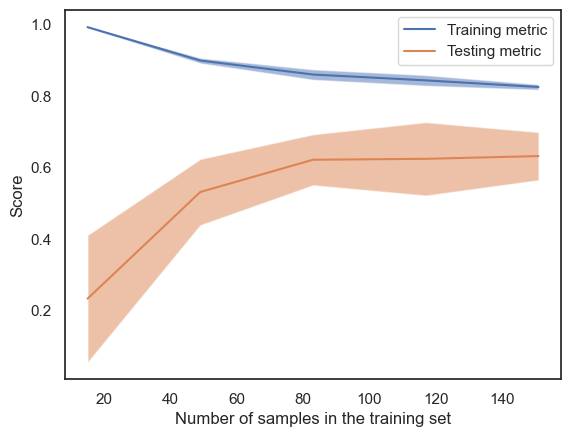

In [48]:
from sklearn.model_selection import LearningCurveDisplay
LearningCurveDisplay.from_estimator(estimator=XGBRegressor(n_estimators=50, max_depth=1), X=X_train, y=y_train, score_type='both', cv=5)

<a id='section_10'></a>
## xgboost with regularisation

<a href='#section_0'>go up</a>

In [49]:
params = {
    'estimator': XGBRegressor(n_estimators=50, max_depth=1, min_split_loss=0),
    'param_grid': {
        'reg_lambda': np.linspace(0, 1.5, 5),
        'reg_alpha': np.linspace(0, 1.5, 5),
        'learning_rate': [0, 0.2, 0.3, 0.5],
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.3, 'reg_alpha': 0.75, 'reg_lambda': 0.375}

In [51]:
xgbregr = XGBRegressor(n_estimators=50, max_depth=1, learning_rate=0.3, reg_alpha=0.75, reg_lambda=0.375)
xgbregr.fit(X_train, y_train)
y_pred = xgbregr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7497344650476865
MAE: 3.3082378084697415
MSE: 16.436520992886493


In [52]:
print('Metrics on train data:')
y_pred = xgbregr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.8103941555665513
MAE: 2.9415772352269087
MSE: 13.458458936202598


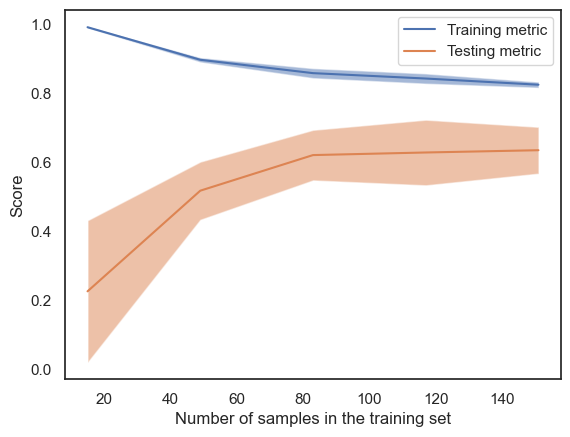

In [53]:
LearningCurveDisplay.from_estimator(estimator=XGBRegressor(n_estimators=50, max_depth=1, learning_rate=0.3, reg_alpha=0.375, reg_lambda=1.125), X=X_train, y=y_train, score_type='both', cv=5)

In [54]:
models.loc[len(models.index)] = ["XGBRegressor(n_estimators=50, max_depth=1, learning_rate=0.3, reg_alpha=0.75, reg_lambda=0.375)", r2_score(y_train, xgbregr.predict(X_train)), r2_score(y_test, xgbregr.predict(X_test))]

In [55]:
models.sort_values(by="r2_test", ascending=False)

,Name,r2_train,r2_test
5,"GradientBoostingRegressor(max_depth=1,n_estima...",0.780907,0.774546
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
3,"AdaBoostRegressor(estimator=DecisionTree(),n_e...",0.832950,0.770616
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
6,"XGBRegressor(n_estimators=50, max_depth=1, lea...",0.810394,0.749734
4,"AdaBoostRegressor(estimator=SVR(),learning_rat...",0.424805,0.527948


<a id='section_101'></a>
## some conclusions from ML models 

We have applied several ML models to our dataset. With a maximum $R^2$ value of $0.77$ (GradientBoostingRegressor), it becomes evident that achieving high prediction scores based solely on these easy-to-measure features without feature engineering is challenging. This observation highlights the importance of measuring density for obtaining the most accurate results in real-life scenarios.  $linear$ kernel in Support Vector Machine shows the best results among other kernels. In the next section, I will attempt to create new features that are not easily captured by polynomial kernels and assess how well my best-performing models from the previous section perform on the updated dataset.

Interestingly, XGBoost does not outperform RandomForest. Among Learning curves we see almost fully convergence of train/test score in Elastic Net model, and extremely small slope on test metric in XGBregressor. It is safe to say, than adding more data unlikely would tend to improvement in terms of $R^2$. Feature ingeneering seems to be a nice shot to make.


<a href='#section_0'>go up</a>

<a id='section_11'></a>
## some feature engineering 

<a href='#section_0'>go up</a>

In [56]:
bodyfat

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [57]:
#into cm and kg
bodyfat['Height'] = bodyfat['Height'] * 2.54
bodyfat['Weight'] = bodyfat['Weight'] * 0.45359237

Body Mass Index (BMI) is a commonly used formula to estimate body fat based on weight and height  $BMI = \frac{weight}{(height)^2}$

In [58]:
bodyfat['BMI'] = bodyfat['Weight'] / (bodyfat['Height']/100)**2

Body Adiposity Index (BAI): BAI is calculated using hip circumference and height. It is considered to be an alternative to BMI. The formula for BAI is:
$BAI = \frac{hip\ \  circumference} {(height^{1.5})} - 18$

In [59]:
bodyfat['BAI'] = bodyfat['Hip'] / bodyfat['Height']**1.5 - 18

Waist-to-Hip Ratio (WHR): WHR is a simple ratio that compares the circumference of the waist to that of the hips. It is a measure of body fat distribution and can be an indicator of health risks. The formula for WHR is:
$WHR = \frac{waist\ \ circumference} {hip\ \ circumference}$

In [60]:
bodyfat['WHR'] = bodyfat['Abdomen']/ bodyfat['Hip']

Waist-to-Height Ratio (WHtR): WHtR is another ratio that compares waist circumference to height. It provides an indication of the amount of abdominal fat and is considered a better predictor of health risks than BMI. The formula for WHtR is:
$WHtR = \frac{waist\ \ circumference} {height}$

In [61]:
bodyfat['WHtR'] = bodyfat['Abdomen'] / bodyfat['Height']

In [62]:
bodyfat.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI', 'BAI', 'WHR', 'WHtR'],
      dtype='object')

In [63]:
X = bodyfat.drop(columns=['Density','BodyFat']).values
y = bodyfat[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<a id='section_12'></a>
## Trying best models with new features 

<a href='#section_0'>go up</a>

In [64]:
models_updated = pd.DataFrame({
    'Name' : [],
    'r2_train':[],
    'r2_test':[]
})
models_updated

,Name,r2_train,r2_test


<a id='section_13'></a>
### RandomForest 

<a href='#section_0'>go up</a>


In [65]:
params = {
    'estimator': RandomForestRegressor(),
    'param_grid': {
        'n_estimators': [ 100, 250, 500],
        'max_depth': [1, 10, 15, None]
    }
}
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [66]:
rforest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7462431868401123
MAE: 3.387240831970542
MSE: 16.665815320456353


In [67]:
print('Metrics on train data:')
y_pred = rforest.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.9549694177316279
MAE: 1.455010297083949
MSE: 3.196326801755826


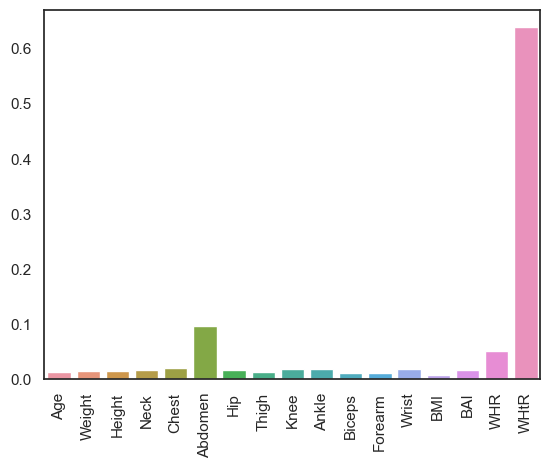

In [68]:
sns.barplot(x=bodyfat.drop(columns=['Density','BodyFat']).columns, y = rforest.feature_importances_ )
plt.xticks(rotation=90)
plt.show()

In [69]:
models_updated.loc[len(models_updated.index)] = ['RandomForestRegressor(max_depth=10, n_estimators=100)', r2_score(y_train, rforest.predict(X_train)), r2_score(y_test, rforest.predict(X_test))]
models_updated

,Name,r2_train,r2_test
0,"RandomForestRegressor(max_depth=10, n_estimato...",0.954969,0.746243


<a id='section_14'></a>
### GradientBoostingRegressor 

<a href='#section_0'>go up</a>


In [70]:
params = {
    'estimator': GradientBoostingRegressor(),
    'param_grid': {
        'n_estimators': [50, 100, 250, 500, 1000],
        'max_depth': [1, 3, 5]
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 1, 'n_estimators': 100}

In [71]:
params = {
    'estimator': GradientBoostingRegressor(max_depth=1,n_estimators=100),
    'param_grid': {
        'learning_rate': [0.01, 0.1, 1],
    }
} 
grid = GridSearchCV(**params)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1}

In [72]:
grboostregr = GradientBoostingRegressor(max_depth=1,n_estimators=100, learning_rate=0.1, random_state=0)
grboostregr.fit(X_train, y_train)
y_pred = grboostregr.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7526875496627468
MAE: 3.3069147484444286
MSE: 16.24257324343527


In [73]:
print('Metrics on train data:')
y_pred = grboostregr.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.8112728712849059
MAE: 2.9751845146616813
MSE: 13.396086600331794


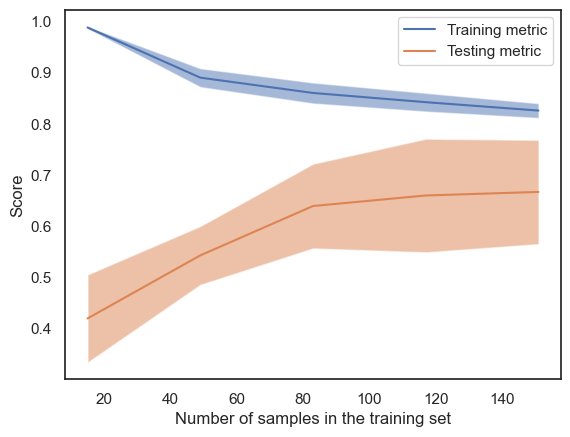

In [74]:
LearningCurveDisplay.from_estimator(estimator=GradientBoostingRegressor(max_depth=1,n_estimators=100, learning_rate=0.1), score_type='both', cv=5, X=X_train, y=y_train)

In [75]:
models_updated.loc[len(models_updated.index)] = ['GradientBoostingRegressor(max_depth=1,learning_rate=0.1)', r2_score(y_train, grboostregr.predict(X_train)), r2_score(y_test, grboostregr.predict(X_test))]
models_updated

,Name,r2_train,r2_test
0,"RandomForestRegressor(max_depth=10, n_estimato...",0.954969,0.746243
1,"GradientBoostingRegressor(max_depth=1,learning...",0.811273,0.752688


<a id='section_15'></a>
### ElasticNet 

<a href='#section_0'>go up</a>

In [76]:
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('elasticnet', ElasticNet())
])
params = {
    'param_grid':{
        'elasticnet__alpha': [0.01, 0.1, 1, 10],
        'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 1]
    }
}
grid = GridSearchCV(pipe, **params)
grid.fit(X_train, y_train)
grid.best_params_

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1}

In [77]:
pipe = Pipeline(
    [
        ('scaler', RobustScaler()),
        ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=1, random_state=0))
    ]
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
show_metrics(y_pred, y_test)

r^2: 0.7677965049156571
MAE: 3.208312615944862
MSE: 15.25027256470872


In [78]:
print('Metrics on train data:')
y_pred = pipe.predict(X_train)
show_metrics(y_pred, y_train)

Metrics on train data:
r^2: 0.7336024940371666
MAE: 3.575555334993471
MSE: 18.909226692988426


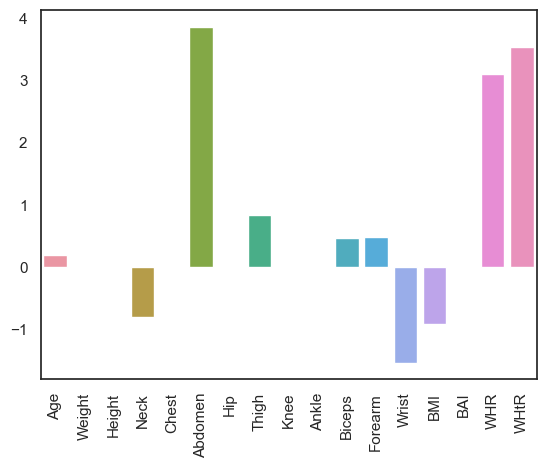

In [79]:
sns.barplot(x=bodyfat.drop(columns=['Density','BodyFat']).columns, y = pipe.__dict__["steps"][-1][-1].coef_ )
plt.xticks(rotation=90)
plt.show()

In [80]:
models_updated.loc[len(models_updated.index)] = ['ElasticNet(alpha=0.1, l1_ratio=1', r2_score(y_train, pipe.predict(X_train)), r2_score(y_test, pipe.predict(X_test))  ]
models_updated

,Name,r2_train,r2_test
0,"RandomForestRegressor(max_depth=10, n_estimato...",0.954969,0.746243
1,"GradientBoostingRegressor(max_depth=1,learning...",0.811273,0.752688
2,"ElasticNet(alpha=0.1, l1_ratio=1",0.733602,0.767797


In [81]:
display(models_updated.sort_values(by="r2_test", ascending=False))
display(models.sort_values(by="r2_test", ascending=False))

,Name,r2_train,r2_test
2,"ElasticNet(alpha=0.1, l1_ratio=1",0.733602,0.767797
1,"GradientBoostingRegressor(max_depth=1,learning...",0.811273,0.752688
0,"RandomForestRegressor(max_depth=10, n_estimato...",0.954969,0.746243


,Name,r2_train,r2_test
5,"GradientBoostingRegressor(max_depth=1,n_estima...",0.780907,0.774546
0,"ElasticNet(alpha=0.01, l1_ratio=1)",0.738873,0.771895
3,"AdaBoostRegressor(estimator=DecisionTree(),n_e...",0.832950,0.770616
2,"RandomForestRegressor(n_estimators=250, max_de...",0.951538,0.770569
1,"SVR(C=10, kernel='linear')",0.730158,0.761220
6,"XGBRegressor(n_estimators=50, max_depth=1, lea...",0.810394,0.749734
4,"AdaBoostRegressor(estimator=SVR(),learning_rat...",0.424805,0.527948


<a id='section_16'></a>
## some conclusions  

We have utilized RandomForest, GradientBoostingRegressor, and Elastic Nets models on our updated dataset. It is evident that all models have shown no improvement from adding new variables. We see train scores became higher while test scores went down - a right sign of overfitting. Notably, Random Forest assigns way more importance to the new features than to old ones. 
Among the models tested, the ElasticNet model yielded the best results in terms of $R^2$ (0.76).

Interestingly, both RandomForest and Elastic Net achieved high performance but assigned importance to different features. There is a surprising moment that Elastic Net assigns a coefficient of 0 to 'weight' feature (maybe because it has all the information from new indices). RandomForest highlights Waist-to-Height Ratio as the most important feature (other features miles less important than this one), that can be seen as evidence WHtR to have a good predictive power.

<a href='#section_0'>go up</a>